# Ejercicio de Regresión Logistica en Python  

Para comenzar se realizan los import necesarios de los paquetes que se utilizan durante el ejercicio

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga del archivo csv (datos de entrada) 

El archivo csv (por simplicidad, se considera que estara en el mismo directorio que el archivo de notebook.ipynb) y se asigna mediante Pandas a la variable datafram. Al utilizar el método dataframe.head() se visualiza en la pantalla los 5 primeros registros

In [3]:
dataframe = pd.read_csv("usuarios win-mac-lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


Se cuantifican resultados de cada tipo usamdo la función grouphy y se visualizan 86 usuarios "Clase 0", es decir Windows, 40 usuarios Mac y 44 de Linux.

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos 

Se realiza una visualizacion para conocer a los atributos caracteristicos de la informacion que se trabaja y su correlacion.

En formato de histograma aparecen los cuatro atributos de entrada etiquetados como: "duracion", "página", "acciones" y "valor". Se puede apreciar gráficamente entre qupe valores se comprenden sus mínimos y máximos y en qué intervalos se concentra la mayor densidad de registros.

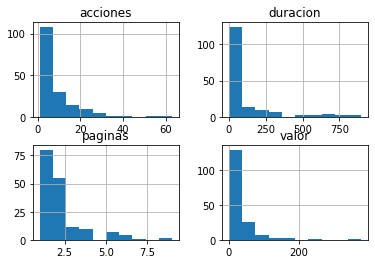

In [5]:
dataframe.drop(['clase'],1).hist()
plt.show()

Ademas se ueden interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistemas Operativo Windows en azul, Macintosh en verde y Linux en rojo.

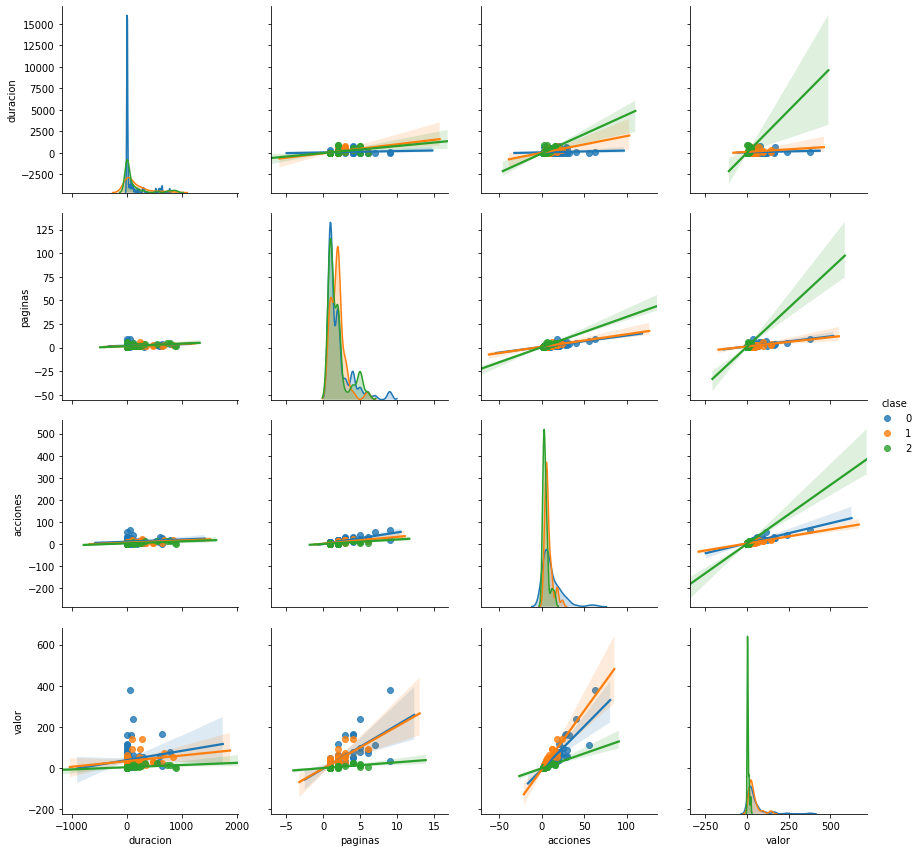

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase', height=3, vars=["duracion","paginas", "acciones", "valor"], kind='reg')

## Se establece el modelo R Log 

Se cargan los atributos de las 4 columnas de entrada en X excluyendo la columna "clase" con el método drop(). La columna "CLase"se agrega al atributo y. Se ejecuta X.shape para comprobar la dimension de la matriz con los datos de entrada 170 registros por 4 columnas

In [7]:
X= np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se ajuste (fit) al conjunot de entrada X y salidas 'y'.


In [11]:
model = linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasifica todo el conjunto de entradas X utilizando el metodo "Predict(x)". Se se revisan alguns de sus salidas se puede ver vomo coincide con las salidas reales del archivo csv.

In [12]:
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


Y se confiram el desempeño del modelo utilizando model.score() el cuál devuelve la precision media de las predicciones, para este caso del 77%

In [13]:
model.score(X,y)

0.7764705882352941

## Adicional: Validación del Modelo 

Una buena practica en Machine Learning es la de subdividir el conjunto de datos de entrada en un conjunto de datos de entrenamiento y uno mas para validar el modelo (que no se utiliza durante el entrenamiento y por lo tanto la máquina). Esto evitará probblemas en los algoritmos pueda fallar por " sobregeneralizar" el conocimiento. 

Para ello, se subdivide los datos de entrada en forma aletoria utilizando 80% de registros para entrenamiento  y 20% para validación

In [29]:
validation_size = 0.20
seed = 7
X_train, X_validation , Y_train, Y_validation = model_selection.train_test_split(X,y,test_size=validation_size, random_state=seed)

Se complica nuevamente el modelo de Regresión Logistica pero esta vez solo con 88% de los datos de entrada y se calcula el nuevo desempeño que ahora registra 74%

In [30]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_result.mean(), cv_result.std())
print(msg)


C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Edgar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

NameError: name 'cv_result' is not defined

Se realizan las predicciones---clasificación---utilizando "cross validation set" el conjunto reservado para la validación. En este caso se aprecia que los aciertos fueron del 85% sin olvidar tener en cuenta que el tamaño de datos es pequeño

In [33]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.8529411764705882


## Report de Resultados del Modelo RLog 

Finalmente se obtiene la "matriz de confusion" la cuál muestra cuántos resultados equivocados tuvo de cada clase (los que no están en la fiagonal); por ejemplo, predijo 3 usuarios que eran Mac como usuarios de Windows y predijo a 2 usuarios Linux que realmente eran de Windows

In [34]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [35]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



Se obtiene el reporte de clasificaión del conjunto de Validación. En este caso (de un total de 34 registros) se utilizaron como "soporte" 18 registros windows, 6 de mac y 10 de Linux. Se aprecia la precisón con que se acertaron cada una de las  clases que , por ejemplo, Macintosh tuvo 3 aciertos y 3 fallos (0.5 recall). Conviene tener en cuenta que F1-score ofrece una valoración que toma en cuenta la precisión y recall. El promedio de F1-score es de 84% lo cual no está nada mal.

## Clasificaón (o predección) de nuevos registros 

Como último ejercicio, se proporcionan datos de entrada de navegación de un usuario sintético y que tiene estos valores:

Tiempo duración: 10 Páginas visitadas: 3 Acciones al navegar: 5 Valoración: 9 Lo probamos en nuestra modelo y vemos que lo clasifica como un usuario top 2, es decir, de Linux.

In [37]:
X_new = pd.DataFrame({'duracion': [10], 'páginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)

array([2], dtype=int64)

Como una extra del ejercicio habrá que jugar y variar estos valores para obtener usuarios de tipo Windows o Macintosh.


En este ejercicio se probó un modelo de Regresíon Logística en Python para la clasificación del uso del Sistema Operativo por parte de usuarios y a partir de sus características de navegación en un sitio web. De este ejercicio, se podrá extender a otro tipos de tareas que pueden surgir durante un trabajo en el que se debe Clasificar resultados en valores discretos. Recordar que si se tuviera que predecir valores continuos, se debera aplicar Regresón Líneal.

Recuerde descargar los archivos para realizar el Ejercicio:

Archivo de Entrada csv (su nombre es usuario win-mac-lin.csv)
Notebook Jupyter Python (clic derecho y "descargar archivo como..."); o bien, se puede ver online n Jupyter Notebook Viewer.

Recordatorio:
Si se interesa en aprender algorítmos con Python, existen muchos mas que están disponible gratuitos por toda la web en una infinidad de idiomas.